# Daily Exchange Rates per Euro 1999-2022

#### Dataset: https://www.kaggle.com/lsind18/euro-exchange-daily-rates-19992020/discussion

#### The goal is to study the exchange rate in Euro compared to another country.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Enables Jupyter to display graphs
%matplotlib inline

In [2]:
exchange_rates = pd.read_csv("C://Users//johng//Desktop//data//euro-daily-hist_1999_2022.csv", encoding="utf-8")

In [3]:
exchange_rates.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5958 entries, 0 to 5957
Data columns (total 41 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Period\Unit:              5958 non-null   object 
 1   [Australian dollar ]      5958 non-null   object 
 2   [Bulgarian lev ]          5556 non-null   object 
 3   [Brazilian real ]         5690 non-null   object 
 4   [Canadian dollar ]        5958 non-null   object 
 5   [Swiss franc ]            5958 non-null   object 
 6   [Chinese yuan renminbi ]  5690 non-null   object 
 7   [Cypriot pound ]          2346 non-null   object 
 8   [Czech koruna ]           5958 non-null   object 
 9   [Danish krone ]           5958 non-null   object 
 10  [Estonian kroon ]         3130 non-null   object 
 11  [UK pound sterling ]      5958 non-null   object 
 12  [Greek drachma ]          520 non-null    object 
 13  [Hong Kong dollar ]       5958 non-null   object 
 14  [Croatia

## <span style="color:blue; font-weight:bold">There are 5958 values, 41 columns, some columns have null value and the vast majority are object type.</span>

# Compare Euro with Brazilian real

In [4]:
# rename column:
exchange_rates.rename(columns={'[Brazilian real ]': 'Real',
                               'Period\\Unit:': 'Time'},
                      inplace=True)
# Time column as datetype:
exchange_rates['Time'] = pd.to_datetime(exchange_rates['Time'])
exchange_rates.sort_values('Time', inplace=True)
exchange_rates.reset_index(drop=True, inplace=True)

In [5]:
#Subset from the dataframe with only Time and Real values:
euro_to_real = exchange_rates[['Time', 'Real']].copy()
# Count the "-" values:
euro_to_real['Real'].value_counts()

-         61
3.3277     4
3.0909     4
2.7570     4
3.2395     4
          ..
2.5599     1
2.5707     1
2.5724     1
2.5667     1
6.3969     1
Name: Real, Length: 5104, dtype: int64

### <span style="color:green">Data cleaning in "Real" column:</span>

In [6]:
# remove "-" values:
euro_to_real = euro_to_real[euro_to_real['Real'] != '-']

#check:
euro_to_real['Real'].value_counts()

3.3277    4
3.0909    4
3.3232    4
3.2395    4
2.7570    4
         ..
2.5599    1
2.5707    1
2.5724    1
2.5667    1
6.3969    1
Name: Real, Length: 5103, dtype: int64

In [7]:
# change column from object to float:
euro_to_real['Real'] = euro_to_real['Real'].astype(float)

#check:
euro_to_real.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5897 entries, 0 to 5957
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Time    5897 non-null   datetime64[ns]
 1   Real    5629 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 138.2 KB


### Visualize the evolution of Euro-Real

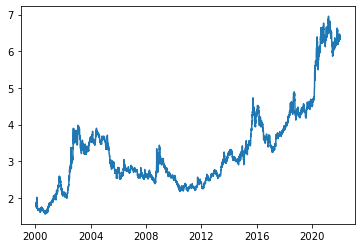

In [8]:
plt.plot(euro_to_real['Time'],
         euro_to_real['Real'])
plt.show()

### Visualize the evolution of the mean

In [9]:
# during 30 days
euro_to_real["rolling_mean"] = euro_to_real["Real"].rolling(30).mean()

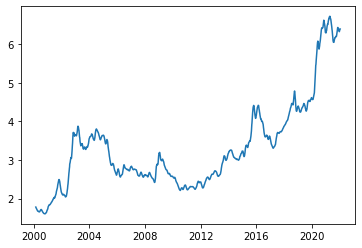

In [10]:
plt.plot(euro_to_real['Time'],
         euro_to_real['rolling_mean'])
plt.show()

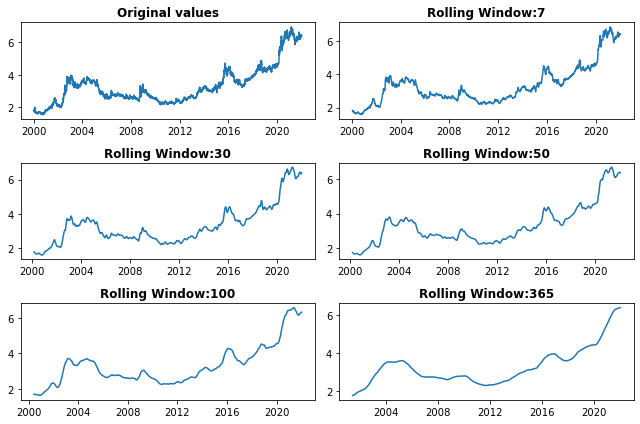

In [11]:
plt.figure(figsize=(9,6))

plt.subplot(3,2,1)
plt.plot(euro_to_real['Time'], euro_to_real['Real'])
plt.title('Original values', weight='bold')

for i, rolling_mean in zip([2, 3, 4, 5, 6],
                           [7, 30, 50, 100, 365]):
    plt.subplot(3,2,i)
    plt.plot(euro_to_real['Time'],
             euro_to_real['Real'].rolling(rolling_mean).mean())
    plt.title('Rolling Window:' + str(rolling_mean), weight='bold')

# Auto-adjusts the padding between subplots
plt.tight_layout() 
plt.show()